# Diffusion and scale invariance

#### Imports and settings

In [43]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

In [44]:
USETEX = False

## Parameters figures
if USETEX:
    plt.rcParams['text.usetex'] = True
    plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath,amssymb} \usepackage[squaren,Gray]{SIunits} \usepackage{nicefrac}'
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'cm'
else:
    plt.rcParams['font.sans-serif'] = "Roboto Condensed"
    plt.rcParams['font.weight'] = "light"
    plt.rcParams['font.family'] = "sans-serif" # always use sans-serif fonts

#font size
plt.rc('font', size=14)  # general font size
plt.rc('axes', labelsize=11, titlesize=10, linewidth=1.)
plt.rc('lines', markersize=12, markeredgewidth=0.5, linewidth=2.)
plt.rc('legend', frameon=False, fancybox=False, numpoints=1, markerscale=1, 
       fontsize=10, handlelength=0.6, handletextpad=0.6, labelspacing=0.3)
plt.rc('xtick',  labelsize=12, direction='in', bottom='true', top='true')
plt.rc('ytick',  labelsize=12, direction='in', left='true', right='true')
plt.rc('savefig', bbox='tight', transparent=True, dpi=300) 

# Part 1: numerical resolution

### First approach: Fourier modes

To solve numerically the diffusion equation we can simply take the Fourier decomposition introduced in the tutorial:

In [46]:
def model(y, t, nterms): # here nterms corresponds to the truncation of the series
    velocity = np.zeros_like(y)
    velocity[:] = y
    for n in range(1, nterms+1):
        velocity += (2. / (n * np.pi)) * (-1)**n * np.sin(n * np.pi * y) * np.exp(-n**2 * np.pi**2 * t)
    return velocity

We may also compute the shear stress at a given position by deriving the previous series

In [9]:
def stress_model(y, t, nterms):
    stress = 1
    for n in range(1, nterms+1):
        stress += 2. * (-1)**n * np.cos(n * np.pi * y) * np.exp(-n**2 * np.pi**2 * t)
    return stress

For long and even moderate times, the method converges very rapidly with a few terms needed

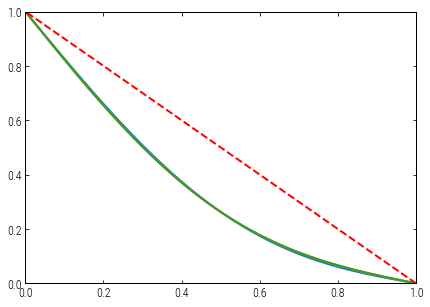

In [51]:
plt.figure(figsize=(7,5))
plt.ylim([0,1])
plt.xlim([0,1])
plt.plot((1-y),model(y,0.1,1))
plt.plot((1-y),model(y,0.1,2))
plt.plot((1-y),model(y,0.1,3))
plt.plot((1-y), y, 'r--')

The solution can be represented for different times:

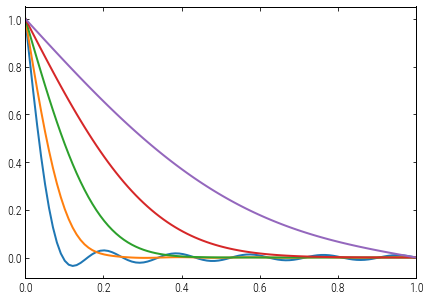

In [55]:
plt.figure(figsize=(7,5))
plt.xlim([0,1])
for i in range(-6,-1):
    t = 10**(i/2)
    plt.plot((1-y),model(y,t,10))

But there it appears that the solution exhibits unphysical oscillations at short times. Adding more terms solve this problem -- at least until we look for shorter times. Clearly this method appears ill-conditioned for short times.

### Second approach : direct numerical resolution

Alternatively, we may solve directly the equation using a finite difference Euler explicit numerical scheme.

In [105]:
Npts = 100
Tend = 0.1
Ntimesteps = 10000
t = np.linspace(0., Tend, Ntimesteps)
deltat = t[1] - t[0]
y = np.linspace(0., 1., Npts)
deltay = y[1] - y[0]
F = deltat/deltay**2
u = np.zeros(Npts) # initial condition
u_n = np.zeros(Npts) # initial condition
u_n[0] = 0
u_n[Npts-1] = 1

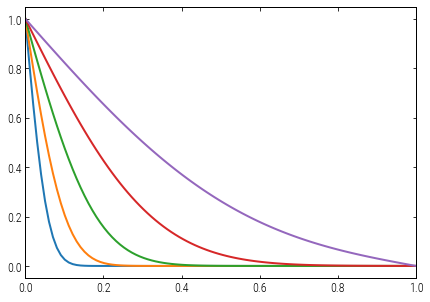

In [96]:
plt.figure(figsize=(7,5))
plt.xlim([0,1])
for n in range(0, Ntimesteps):
    for j in range(1, Npts-1):
        u[j] = u_n[j] + F * (u_n[j-1] - 2 * u_n[j] + u_n[j+1])
    u[0] = 0
    u[Npts-1] = 1
    u_n[:] = u[:]
    if (n == 100):
        plt.plot((1-y),u)
    if (n == 316):
        plt.plot((1-y),u)
    if (n == 1000):
        plt.plot((1-y),u)
    if (n == 3160):
        plt.plot((1-y),u)
    if (n == 9999):
        plt.plot((1-y),u)

This method is better suited for shorter, but care must be taken for convergence and stability. Besides, it clearly cannot capture scales of size $< \Delta y$.

# Part 2: Scale invariance

Following the scale invariance analysis we now represent the solution for different times as a function of $\eta = y/\sqrt{t}$.

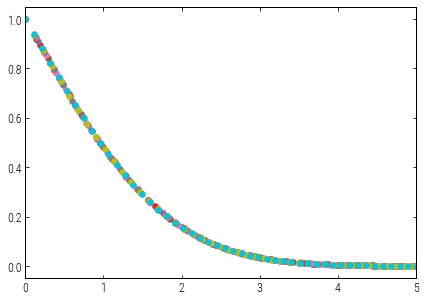

In [109]:
plt.figure(figsize=(7,5))
plt.xlim([0,5])
Npts = 100
Tend = 0.01
Ntimesteps = 100000
t = np.linspace(0., Tend, Ntimesteps)
deltat = t[1] - t[0]
y = np.linspace(0., 1., Npts)
deltay = y[1] - y[0]
F = deltat/deltay**2
u = np.zeros(Npts) # initial condition
u_n = np.zeros(Npts) # initial condition
u_n[0] = 0
u_n[Npts-1] = 1
for n in range(0, Ntimesteps):
    for j in range(1, Npts-1):
        u[j] = u_n[j] + F * (u_n[j-1] - 2 * u_n[j] + u_n[j+1])
    u[0] = 0
    u[Npts-1] = 1
    u_n[:] = u[:]
    if (n%10000 == 10):
        plt.plot((1-y)/np.sqrt(n*deltat),u,'.') 
eta = np.linspace(0., 5., Npts)

The collapse is very nice! Let's now compare this numerical solution with the analytical solution.

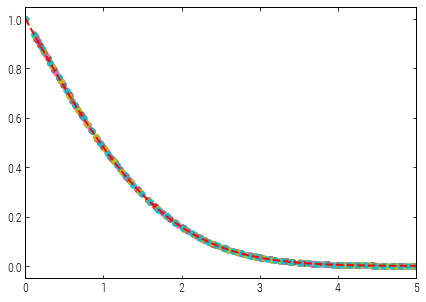

In [110]:
plt.figure(figsize=(7,5))
plt.xlim([0,5])
Npts = 100
Tend = 0.01
Ntimesteps = 100000
t = np.linspace(0., Tend, Ntimesteps)
deltat = t[1] - t[0]
y = np.linspace(0., 1., Npts)
deltay = y[1] - y[0]
F = deltat/deltay**2
u = np.zeros(Npts) # initial condition
u_n = np.zeros(Npts) # initial condition
u_n[0] = 0
u_n[Npts-1] = 1
for n in range(0, Ntimesteps):
    for j in range(1, Npts-1):
        u[j] = u_n[j] + F * (u_n[j-1] - 2 * u_n[j] + u_n[j+1])
    u[0] = 0
    u[Npts-1] = 1
    u_n[:] = u[:]
    if (n%10000 == 10):
        plt.plot((1-y)/np.sqrt(n*deltat),u,'.') 
eta = np.linspace(0., 5., Npts)
plt.plot(eta,special.erfc(eta/2),'r--')

Similarly let's represent the comparison between the self-similar solution and the numerical solution in the physical space.

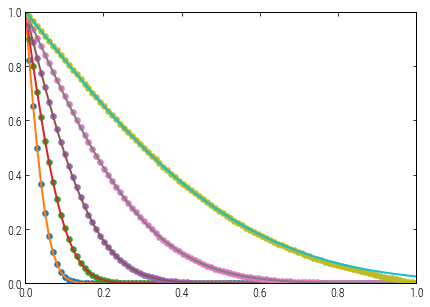

In [111]:
plt.figure(figsize=(7,5))
plt.ylim([0,1])
plt.xlim([0,1])
for i in range(-6,-1):
    t = 10**(i/2)
    plt.plot((1-y),model(y,t,200),'.')
    plt.plot((1-y),special.erfc((1-y)/np.sqrt(t)/2))